
<center>

## Proyecto: Bases de Datos

### Curso Propedeutico de Bases de Datos - MCD 2024

### Jupyter Notebook desarrollado por:
##### Luis Fernando Martinez

</center>

Comenzamos por importar los paquetes de Python que vamos a requerir.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

Montamos nuestro drive de Google Drive para acceder a nuestra base de datos.

En mi caso, cargue una base de datos de SQLite3 de inspecciones sanitaras en restaurantes de USA (2016-2019) que genere descargando los datos en CSV desde la fuente, y cargandolos a una tabla con su respectivo schema en mi instalacion local de SQLite3.

Fuente de los datos: http://www.sfdph.org/dph/EH/Food/score/default.asp

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Procedemos a conectarnos con la base de datos a traves del propio paquete de Python de SQLite3 y hacemos uso de las funciones de pandas para utilizar la misma conexion, extraer los datos e integrarlos directo a un DataFrame.

In [3]:
db_path = "/content/gdrive/MyDrive/sqlite_dbs/restaurant_health_inspection.db"

try:
  connection = sqlite3.connect(db_path)
  print("Conexion OK!")

  '''
  cursor = connection.cursor()
  cursor.execute("SELECT * FROM inspections")
  db_data = cursor.fetchall()
  print("Datos obtenidos satisfactoriamente.")
  cursor.close()
  '''

  df = pd.read_sql_query("SELECT * FROM inspections", connection)
  print("Datos obtenidos satisfactoriamente.")

except:
  print("Surgio un error durante el intento de conexion y/o lectura de la base de datos.")

finally:
  if connection:
    connection.close()
    print("Conexion terminada.")

Conexion OK!
Datos obtenidos satisfactoriamente.
Conexion terminada.


In [4]:
df # Damos un vistazo rapido a los datos que recien obtuvimos

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,85936,Laurel Court,950 Mason St,San Francisco,CA,94108,,,,+14155775000,...,100,Routine - Unscheduled,,,,,,,,
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134,37.729016,-122.419253,POINT (-122.419253 37.729016),+14155464722,...,,Reinspection/Followup,,,,92,92,2,2,7
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109,,,,,...,,New Ownership - Followup,,,,,,,,
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110,37.763156,-122.410351,POINT (-122.410351 37.763156),,...,,Reinspection/Followup,,,,53,53,3,2,20
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,94133,,,,,...,96,Routine - Unscheduled,97722_20181217_103154,Unclean or degraded floors walls or ceilings,Low Risk,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,70220,Trader Joe's #200,1095 Hyde St,San Francisco,CA,94109,,,,+14155297665,...,,Complaint,,,,,,,,
53969,95021,Wing Wings,422 Haight St,San Francisco,CA,94117,,,,+14155835001,...,92,Routine - Unscheduled,95021_20190228_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,,,,,
53970,78289,Sam Jordans Bar,4004 03rd St,San Francisco,CA,94124,,,,,...,,Reinspection/Followup,,,,,,,,
53971,100887,ASIA CHINESE FOOD,350 BAY ST.,San Francisco,CA,94133,,,,+14155816395,...,,New Ownership - Followup,,,,,,,,


Ahora generaremos un par de graficos para visualizar los datos que obtuvimos de la base de datos.

Para esto haremos uso del modulo de Pyplot de Matplotlib.

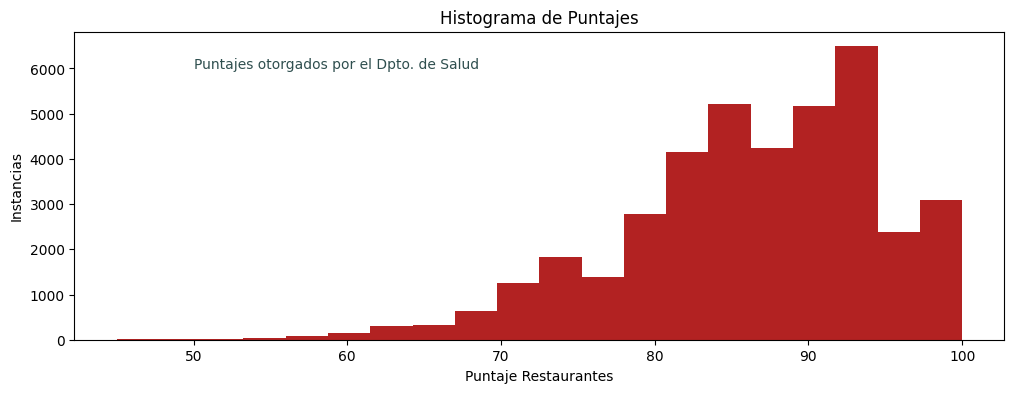

In [5]:
scores = df['inspection_score'].replace(r'^\s*$', np.nan, regex=True).dropna().astype('int')

plt.figure(figsize=(12,4))
plt.hist(scores, color="firebrick", bins=20)
plt.title("Histograma de Puntajes")
plt.xlabel('Puntaje Restaurantes')
plt.ylabel("Instancias")
plt.text(50, 6000, r"Puntajes otorgados por el Dpto. de Salud", color='darkslategrey')
plt.show()

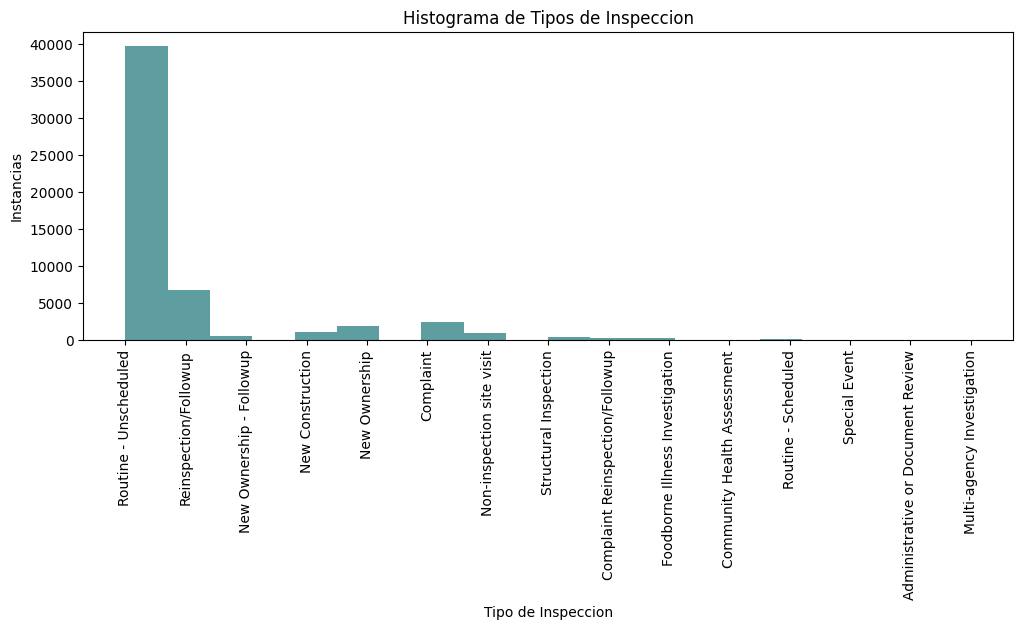

In [6]:
scores = df['inspection_type'].replace(r'^\s*$', np.nan, regex=True).dropna()

plt.figure(figsize=(12,4))
plt.hist(scores, color="cadetblue", bins=20)
plt.title("Histograma de Tipos de Inspeccion")
plt.xlabel('Tipo de Inspeccion')
plt.xticks(rotation=90)
plt.ylabel("Instancias")
plt.show()

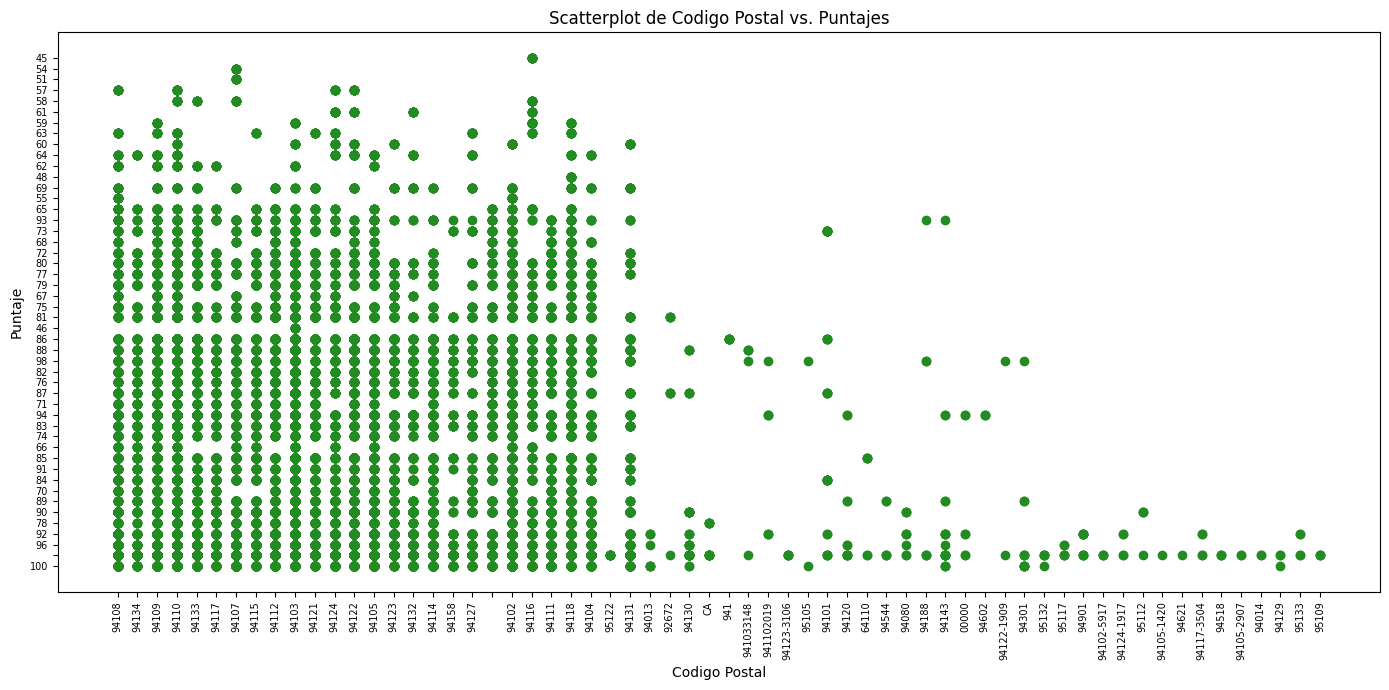

In [7]:
#bcps = df['business_postal_code'].replace(r'^\s*|CA$', np.nan, regex=True).dropna().astype('int')

data = df[df['business_postal_code']!='']
data = df[df['business_postal_code']!='CA']
data = df[df['business_postal_code']!=' ']
data = df[df['business_postal_code']!='Ca']

x = data['business_postal_code']
y = data['inspection_score']

plt.figure(figsize=(14,7))
plt.scatter(x, y, color="forestgreen")
plt.title("Scatterplot de Codigo Postal vs. Puntajes")
plt.xlabel('Codigo Postal')
plt.xticks(rotation=90, fontsize=7)
plt.ylabel("Puntaje")
plt.yticks(fontsize=7)
plt.tight_layout()
plt.show()